In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
big_df = pd.read_csv(r'D:\Graduation Project\QuadPlane Design\APC Propellers\PERFILES_WEB\all_props_cleaned_petite.csv')
big_df.head()

,V,Thrust,diameter,pitch,rpm
0,0.0,0.032,10.5,4.5,1000.0
1,0.2,0.032,10.5,4.5,1000.0
2,0.4,0.031,10.5,4.5,1000.0
3,0.7,0.031,10.5,4.5,1000.0
4,0.9,0.030,10.5,4.5,1000.0


In [3]:
import tensorflow as tf

In [4]:
dataset = big_df.copy()
dataset.tail()

,V,Thrust,diameter,pitch,rpm
293474,191.0,4.365,9.0,9.0,21000.0
293475,198.7,3.338,9.0,9.0,21000.0
293476,206.3,2.277,9.0,9.0,21000.0
293477,214.0,1.189,9.0,9.0,21000.0
293478,221.6,0.009,9.0,9.0,21000.0


In [5]:
dataset.isna().sum()

V           0
Thrust      1
diameter    0
pitch       0
rpm         0
dtype: int64

In [6]:
dataset = dataset.dropna()

In [7]:
dataset.isna().sum()

V           0
Thrust      0
diameter    0
pitch       0
rpm         0
dtype: int64

In [8]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_dataset.tail()

,V,Thrust,diameter,pitch,rpm
128473,68.4,34.477,20.00,14.00,9000.0
216443,89.8,5.334,7.00,5.00,26000.0
153175,217.4,1.552,4.75,4.75,43000.0
101545,59.9,19.442,16.00,4.00,15000.0
207862,85.6,1.142,7.80,7.00,13000.0


In [9]:
train_labels = train_dataset.pop('Thrust')
test_labels = test_dataset.pop('Thrust')
train_dataset.head()

,V,diameter,pitch,rpm
112269,39.3,18.1,10.0,5000.0
201258,5.3,7.4,7.6,18000.0
185035,51.3,6.5,3.7,17000.0
129423,33.9,20.0,15.0,9000.0
13743,26.3,10.0,8.0,20000.0


In [10]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
V,234782.0,49.707743,45.637459,-42.0,13.6,36.20,73.8,319.6
diameter,234782.0,10.523603,4.487367,4.0,7.0,9.25,13.5,27.0
pitch,234782.0,7.308001,3.348207,2.0,4.5,6.50,10.0,22.5
rpm,234782.0,12508.699700,9050.014395,1000.0,6000.0,11000.00,17000.0,45000.0


In [11]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data.head()

,V,diameter,pitch,rpm
112269,-0.228053,1.688384,0.804012,-0.829689
201258,-0.973055,-0.696088,0.087211,0.606773
185035,0.034889,-0.896651,-1.077592,0.496275
129423,-0.346376,2.111795,2.297349,-0.387701
13743,-0.512906,-0.116684,0.206678,0.827767


In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.Adam()

model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

model.summary()

W1023 01:13:46.402871 17716 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 7,105
Trainable params: 7,105
Non-trainable params: 0
_________________________________________________________________


In [13]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.005535  ],
       [ 0.02606409],
       [ 0.03709263],
       [ 0.0102773 ],
       [ 0.05028727],
       [ 0.01764214],
       [-0.05810426],
       [-0.03597635],
       [ 0.0485753 ],
       [-0.00335041]], dtype=float32)

In [14]:
EPOCHS = 1000
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=1)

Train on 187825 samples, validate on 46957 samples
Epoch 1/1000
187825/187825 [==============================] - 10s 52us/sample - loss: 3.9235 - mean_absolute_error: 0.9202 - mean_squared_error: 3.9235 - val_loss: 1.8220 - val_mean_absolute_error: 0.7680 - val_mean_squared_error: 1.8220
Epoch 2/1000
187825/187825 [==============================] - 8s 45us/sample - loss: 1.6854 - mean_absolute_error: 0.6912 - mean_squared_error: 1.6854 - val_loss: 1.5242 - val_mean_absolute_error: 0.6428 - val_mean_squared_error: 1.5242
Epoch 3/1000
187825/187825 [==============================] - 9s 46us/sample - loss: 1.5807 - mean_absolute_error: 0.6558 - mean_squared_error: 1.5807 - val_loss: 1.6942 - val_mean_absolute_error: 0.6628 - val_mean_squared_error: 1.6942
Epoch 4/1000
187825/187825 [==============================] - 9s 47us/sample - loss: 1.5293 - mean_absolute_error: 0.6367 - mean_squared_error: 1.5293 - val_loss: 1.5163 - val_mean_absolute_error: 0.6069 - val_mean_squared_error: 1.5163


187825/187825 [==============================] - 7s 39us/sample - loss: 1.0222 - mean_absolute_error: 0.4971 - mean_squared_error: 1.0222 - val_loss: 1.1320 - val_mean_absolute_error: 0.5105 - val_mean_squared_error: 1.1320
Epoch 36/1000
187825/187825 [==============================] - 7s 39us/sample - loss: 1.0190 - mean_absolute_error: 0.4950 - mean_squared_error: 1.0190 - val_loss: 1.1366 - val_mean_absolute_error: 0.5145 - val_mean_squared_error: 1.1366
Epoch 37/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 1.0165 - mean_absolute_error: 0.4940 - mean_squared_error: 1.0165 - val_loss: 1.0275 - val_mean_absolute_error: 0.4811 - val_mean_squared_error: 1.0275
Epoch 38/1000
187825/187825 [==============================] - 8s 43us/sample - loss: 1.0078 - mean_absolute_error: 0.4917 - mean_squared_error: 1.0078 - val_loss: 1.1142 - val_mean_absolute_error: 0.5091 - val_mean_squared_error: 1.1142
Epoch 39/1000
187825/187825 [==============================] -

187825/187825 [==============================] - 7s 39us/sample - loss: 0.9034 - mean_absolute_error: 0.4640 - mean_squared_error: 0.9034 - val_loss: 0.9534 - val_mean_absolute_error: 0.4726 - val_mean_squared_error: 0.9534
Epoch 70/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.8999 - mean_absolute_error: 0.4642 - mean_squared_error: 0.8999 - val_loss: 1.0840 - val_mean_absolute_error: 0.4853 - val_mean_squared_error: 1.0840
Epoch 71/1000
187825/187825 [==============================] - 7s 37us/sample - loss: 0.8965 - mean_absolute_error: 0.4619 - mean_squared_error: 0.8965 - val_loss: 0.9962 - val_mean_absolute_error: 0.4643 - val_mean_squared_error: 0.9961
Epoch 72/1000
187825/187825 [==============================] - 7s 39us/sample - loss: 0.8953 - mean_absolute_error: 0.4614 - mean_squared_error: 0.8954 - val_loss: 0.9777 - val_mean_absolute_error: 0.4843 - val_mean_squared_error: 0.9777
Epoch 73/1000
187825/187825 [==============================] -

187825/187825 [==============================] - 7s 40us/sample - loss: 0.8410 - mean_absolute_error: 0.4471 - mean_squared_error: 0.8410 - val_loss: 0.9157 - val_mean_absolute_error: 0.4494 - val_mean_squared_error: 0.9157
Epoch 104/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.8384 - mean_absolute_error: 0.4452 - mean_squared_error: 0.8384 - val_loss: 0.9131 - val_mean_absolute_error: 0.4489 - val_mean_squared_error: 0.9131
Epoch 105/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.8352 - mean_absolute_error: 0.4456 - mean_squared_error: 0.8352 - val_loss: 0.9217 - val_mean_absolute_error: 0.4516 - val_mean_squared_error: 0.9217
Epoch 106/1000
187825/187825 [==============================] - 7s 39us/sample - loss: 0.8364 - mean_absolute_error: 0.4454 - mean_squared_error: 0.8364 - val_loss: 0.9339 - val_mean_absolute_error: 0.4545 - val_mean_squared_error: 0.9339
Epoch 107/1000
187825/187825 [=============================

187825/187825 [==============================] - 7s 39us/sample - loss: 0.7933 - mean_absolute_error: 0.4338 - mean_squared_error: 0.7933 - val_loss: 0.8977 - val_mean_absolute_error: 0.4643 - val_mean_squared_error: 0.8977
Epoch 138/1000
187825/187825 [==============================] - 7s 39us/sample - loss: 0.7961 - mean_absolute_error: 0.4347 - mean_squared_error: 0.7961 - val_loss: 0.8713 - val_mean_absolute_error: 0.4386 - val_mean_squared_error: 0.8713
Epoch 139/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.8038 - mean_absolute_error: 0.4356 - mean_squared_error: 0.8038 - val_loss: 1.0132 - val_mean_absolute_error: 0.4770 - val_mean_squared_error: 1.0132
Epoch 140/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.7979 - mean_absolute_error: 0.4344 - mean_squared_error: 0.7979 - val_loss: 0.8748 - val_mean_absolute_error: 0.4399 - val_mean_squared_error: 0.8748
Epoch 141/1000
187825/187825 [=============================

187825/187825 [==============================] - 7s 38us/sample - loss: 0.7635 - mean_absolute_error: 0.4265 - mean_squared_error: 0.7635 - val_loss: 0.8137 - val_mean_absolute_error: 0.4433 - val_mean_squared_error: 0.8137
Epoch 172/1000
187825/187825 [==============================] - 7s 39us/sample - loss: 0.7701 - mean_absolute_error: 0.4264 - mean_squared_error: 0.7701 - val_loss: 0.7976 - val_mean_absolute_error: 0.4373 - val_mean_squared_error: 0.7976
Epoch 173/1000
187825/187825 [==============================] - 8s 40us/sample - loss: 0.7582 - mean_absolute_error: 0.4264 - mean_squared_error: 0.7582 - val_loss: 0.8063 - val_mean_absolute_error: 0.4274 - val_mean_squared_error: 0.8063
Epoch 174/1000
187825/187825 [==============================] - 8s 40us/sample - loss: 0.7618 - mean_absolute_error: 0.4258 - mean_squared_error: 0.7618 - val_loss: 0.9180 - val_mean_absolute_error: 0.4600 - val_mean_squared_error: 0.9180
Epoch 175/1000
187825/187825 [=============================

187825/187825 [==============================] - 7s 38us/sample - loss: 0.7410 - mean_absolute_error: 0.4206 - mean_squared_error: 0.7410 - val_loss: 0.8509 - val_mean_absolute_error: 0.4515 - val_mean_squared_error: 0.8509
Epoch 206/1000
187825/187825 [==============================] - 8s 40us/sample - loss: 0.7535 - mean_absolute_error: 0.4234 - mean_squared_error: 0.7535 - val_loss: 0.8066 - val_mean_absolute_error: 0.4339 - val_mean_squared_error: 0.8066
Epoch 207/1000
187825/187825 [==============================] - 8s 42us/sample - loss: 0.7442 - mean_absolute_error: 0.4199 - mean_squared_error: 0.7442 - val_loss: 0.7936 - val_mean_absolute_error: 0.4260 - val_mean_squared_error: 0.7936
Epoch 208/1000
187825/187825 [==============================] - 7s 39us/sample - loss: 0.7396 - mean_absolute_error: 0.4195 - mean_squared_error: 0.7396 - val_loss: 0.8050 - val_mean_absolute_error: 0.4275 - val_mean_squared_error: 0.8050
Epoch 209/1000
187825/187825 [=============================

187825/187825 [==============================] - 8s 40us/sample - loss: 0.7239 - mean_absolute_error: 0.4172 - mean_squared_error: 0.7239 - val_loss: 0.8990 - val_mean_absolute_error: 0.4568 - val_mean_squared_error: 0.8990
Epoch 240/1000
187825/187825 [==============================] - 7s 40us/sample - loss: 0.7185 - mean_absolute_error: 0.4159 - mean_squared_error: 0.7185 - val_loss: 0.8138 - val_mean_absolute_error: 0.4262 - val_mean_squared_error: 0.8138
Epoch 241/1000
187825/187825 [==============================] - 7s 40us/sample - loss: 0.7276 - mean_absolute_error: 0.4185 - mean_squared_error: 0.7276 - val_loss: 0.8274 - val_mean_absolute_error: 0.4340 - val_mean_squared_error: 0.8274
Epoch 242/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.7213 - mean_absolute_error: 0.4163 - mean_squared_error: 0.7213 - val_loss: 0.7931 - val_mean_absolute_error: 0.4328 - val_mean_squared_error: 0.7931
Epoch 243/1000
187825/187825 [=============================

187825/187825 [==============================] - 7s 40us/sample - loss: 0.7069 - mean_absolute_error: 0.4138 - mean_squared_error: 0.7069 - val_loss: 0.7937 - val_mean_absolute_error: 0.4308 - val_mean_squared_error: 0.7937
Epoch 274/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.7075 - mean_absolute_error: 0.4112 - mean_squared_error: 0.7075 - val_loss: 0.8203 - val_mean_absolute_error: 0.4244 - val_mean_squared_error: 0.8203
Epoch 275/1000
187825/187825 [==============================] - 7s 37us/sample - loss: 0.7113 - mean_absolute_error: 0.4137 - mean_squared_error: 0.7113 - val_loss: 0.7468 - val_mean_absolute_error: 0.4170 - val_mean_squared_error: 0.7468
Epoch 276/1000
187825/187825 [==============================] - 7s 40us/sample - loss: 0.7045 - mean_absolute_error: 0.4112 - mean_squared_error: 0.7045 - val_loss: 0.7528 - val_mean_absolute_error: 0.4159 - val_mean_squared_error: 0.7528
Epoch 277/1000
187825/187825 [=============================

187825/187825 [==============================] - 7s 40us/sample - loss: 0.6921 - mean_absolute_error: 0.4086 - mean_squared_error: 0.6921 - val_loss: 0.7528 - val_mean_absolute_error: 0.4292 - val_mean_squared_error: 0.7528
Epoch 308/1000
187825/187825 [==============================] - 7s 39us/sample - loss: 0.6886 - mean_absolute_error: 0.4079 - mean_squared_error: 0.6886 - val_loss: 0.7644 - val_mean_absolute_error: 0.4155 - val_mean_squared_error: 0.7644
Epoch 309/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.7007 - mean_absolute_error: 0.4097 - mean_squared_error: 0.7007 - val_loss: 0.7353 - val_mean_absolute_error: 0.4128 - val_mean_squared_error: 0.7353
Epoch 310/1000
187825/187825 [==============================] - 7s 39us/sample - loss: 0.6919 - mean_absolute_error: 0.4080 - mean_squared_error: 0.6919 - val_loss: 0.7178 - val_mean_absolute_error: 0.4095 - val_mean_squared_error: 0.7178
Epoch 311/1000
187825/187825 [=============================

187825/187825 [==============================] - 7s 38us/sample - loss: 0.6904 - mean_absolute_error: 0.4063 - mean_squared_error: 0.6904 - val_loss: 0.7715 - val_mean_absolute_error: 0.4176 - val_mean_squared_error: 0.7715
Epoch 342/1000
187825/187825 [==============================] - 8s 40us/sample - loss: 0.6802 - mean_absolute_error: 0.4044 - mean_squared_error: 0.6802 - val_loss: 0.7416 - val_mean_absolute_error: 0.4086 - val_mean_squared_error: 0.7416
Epoch 343/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.6748 - mean_absolute_error: 0.4033 - mean_squared_error: 0.6748 - val_loss: 0.7905 - val_mean_absolute_error: 0.4252 - val_mean_squared_error: 0.7905
Epoch 344/1000
187825/187825 [==============================] - 7s 39us/sample - loss: 0.6826 - mean_absolute_error: 0.4047 - mean_squared_error: 0.6826 - val_loss: 0.7980 - val_mean_absolute_error: 0.4212 - val_mean_squared_error: 0.7980
Epoch 345/1000
187825/187825 [=============================

187825/187825 [==============================] - 7s 38us/sample - loss: 0.6711 - mean_absolute_error: 0.4011 - mean_squared_error: 0.6711 - val_loss: 0.7313 - val_mean_absolute_error: 0.4129 - val_mean_squared_error: 0.7313
Epoch 376/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.6679 - mean_absolute_error: 0.4009 - mean_squared_error: 0.6679 - val_loss: 0.7195 - val_mean_absolute_error: 0.4064 - val_mean_squared_error: 0.7195
Epoch 377/1000
187825/187825 [==============================] - 8s 41us/sample - loss: 0.6672 - mean_absolute_error: 0.4001 - mean_squared_error: 0.6672 - val_loss: 0.7455 - val_mean_absolute_error: 0.4117 - val_mean_squared_error: 0.7455
Epoch 378/1000
187825/187825 [==============================] - 8s 42us/sample - loss: 0.6739 - mean_absolute_error: 0.4008 - mean_squared_error: 0.6739 - val_loss: 0.7376 - val_mean_absolute_error: 0.4260 - val_mean_squared_error: 0.7376
Epoch 379/1000
187825/187825 [=============================

187825/187825 [==============================] - 7s 39us/sample - loss: 0.6675 - mean_absolute_error: 0.3993 - mean_squared_error: 0.6675 - val_loss: 0.7591 - val_mean_absolute_error: 0.4185 - val_mean_squared_error: 0.7591
Epoch 410/1000
187825/187825 [==============================] - 8s 40us/sample - loss: 0.6606 - mean_absolute_error: 0.3977 - mean_squared_error: 0.6606 - val_loss: 0.7151 - val_mean_absolute_error: 0.4083 - val_mean_squared_error: 0.7151
Epoch 411/1000
187825/187825 [==============================] - 8s 41us/sample - loss: 0.6560 - mean_absolute_error: 0.3985 - mean_squared_error: 0.6560 - val_loss: 0.7332 - val_mean_absolute_error: 0.4116 - val_mean_squared_error: 0.7332
Epoch 412/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.6638 - mean_absolute_error: 0.3996 - mean_squared_error: 0.6638 - val_loss: 0.7145 - val_mean_absolute_error: 0.4034 - val_mean_squared_error: 0.7145
Epoch 413/1000
187825/187825 [=============================

187825/187825 [==============================] - 8s 42us/sample - loss: 0.6530 - mean_absolute_error: 0.3951 - mean_squared_error: 0.6530 - val_loss: 0.7758 - val_mean_absolute_error: 0.4199 - val_mean_squared_error: 0.7758
Epoch 444/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.6536 - mean_absolute_error: 0.3967 - mean_squared_error: 0.6536 - val_loss: 0.8624 - val_mean_absolute_error: 0.4221 - val_mean_squared_error: 0.8624
Epoch 445/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.6561 - mean_absolute_error: 0.3968 - mean_squared_error: 0.6561 - val_loss: 0.7036 - val_mean_absolute_error: 0.4054 - val_mean_squared_error: 0.7036
Epoch 446/1000
187825/187825 [==============================] - 7s 39us/sample - loss: 0.6625 - mean_absolute_error: 0.3980 - mean_squared_error: 0.6625 - val_loss: 0.7397 - val_mean_absolute_error: 0.4083 - val_mean_squared_error: 0.7397
Epoch 447/1000
187825/187825 [=============================

187825/187825 [==============================] - 7s 38us/sample - loss: 0.6491 - mean_absolute_error: 0.3947 - mean_squared_error: 0.6491 - val_loss: 0.7120 - val_mean_absolute_error: 0.4038 - val_mean_squared_error: 0.7120
Epoch 478/1000
187825/187825 [==============================] - 8s 41us/sample - loss: 0.6526 - mean_absolute_error: 0.3956 - mean_squared_error: 0.6526 - val_loss: 0.7498 - val_mean_absolute_error: 0.4186 - val_mean_squared_error: 0.7498
Epoch 479/1000
187825/187825 [==============================] - 7s 39us/sample - loss: 0.6516 - mean_absolute_error: 0.3970 - mean_squared_error: 0.6516 - val_loss: 0.7088 - val_mean_absolute_error: 0.4039 - val_mean_squared_error: 0.7088
Epoch 480/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.6480 - mean_absolute_error: 0.3950 - mean_squared_error: 0.6480 - val_loss: 0.8537 - val_mean_absolute_error: 0.4557 - val_mean_squared_error: 0.8537
Epoch 481/1000
187825/187825 [=============================

187825/187825 [==============================] - 8s 41us/sample - loss: 0.6420 - mean_absolute_error: 0.3931 - mean_squared_error: 0.6420 - val_loss: 0.7154 - val_mean_absolute_error: 0.4032 - val_mean_squared_error: 0.7154
Epoch 512/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.6481 - mean_absolute_error: 0.3934 - mean_squared_error: 0.6481 - val_loss: 0.7207 - val_mean_absolute_error: 0.4059 - val_mean_squared_error: 0.7207
Epoch 513/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.6404 - mean_absolute_error: 0.3929 - mean_squared_error: 0.6403 - val_loss: 0.7062 - val_mean_absolute_error: 0.4060 - val_mean_squared_error: 0.7062
Epoch 514/1000
187825/187825 [==============================] - 8s 40us/sample - loss: 0.6460 - mean_absolute_error: 0.3941 - mean_squared_error: 0.6460 - val_loss: 0.6964 - val_mean_absolute_error: 0.3997 - val_mean_squared_error: 0.6964
Epoch 515/1000
187825/187825 [=============================

187825/187825 [==============================] - 7s 39us/sample - loss: 0.6349 - mean_absolute_error: 0.3911 - mean_squared_error: 0.6349 - val_loss: 0.7537 - val_mean_absolute_error: 0.4184 - val_mean_squared_error: 0.7537
Epoch 546/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.6303 - mean_absolute_error: 0.3894 - mean_squared_error: 0.6303 - val_loss: 0.7111 - val_mean_absolute_error: 0.4005 - val_mean_squared_error: 0.7111
Epoch 547/1000
187825/187825 [==============================] - 8s 44us/sample - loss: 0.6367 - mean_absolute_error: 0.3918 - mean_squared_error: 0.6367 - val_loss: 0.6972 - val_mean_absolute_error: 0.4063 - val_mean_squared_error: 0.6972
Epoch 548/1000
187825/187825 [==============================] - 8s 45us/sample - loss: 0.6339 - mean_absolute_error: 0.3909 - mean_squared_error: 0.6339 - val_loss: 0.7139 - val_mean_absolute_error: 0.4029 - val_mean_squared_error: 0.7139
Epoch 549/1000
187825/187825 [=============================

187825/187825 [==============================] - 7s 40us/sample - loss: 0.6317 - mean_absolute_error: 0.3901 - mean_squared_error: 0.6317 - val_loss: 0.7160 - val_mean_absolute_error: 0.3971 - val_mean_squared_error: 0.7160
Epoch 580/1000
187825/187825 [==============================] - 8s 44us/sample - loss: 0.6307 - mean_absolute_error: 0.3888 - mean_squared_error: 0.6307 - val_loss: 0.7510 - val_mean_absolute_error: 0.4084 - val_mean_squared_error: 0.7510
Epoch 581/1000
187825/187825 [==============================] - 7s 39us/sample - loss: 0.6346 - mean_absolute_error: 0.3891 - mean_squared_error: 0.6346 - val_loss: 0.7083 - val_mean_absolute_error: 0.4148 - val_mean_squared_error: 0.7083
Epoch 582/1000
187825/187825 [==============================] - 7s 39us/sample - loss: 0.6272 - mean_absolute_error: 0.3892 - mean_squared_error: 0.6272 - val_loss: 0.6849 - val_mean_absolute_error: 0.3911 - val_mean_squared_error: 0.6849
Epoch 583/1000
187825/187825 [=============================

187825/187825 [==============================] - 8s 40us/sample - loss: 0.6281 - mean_absolute_error: 0.3874 - mean_squared_error: 0.6281 - val_loss: 0.7596 - val_mean_absolute_error: 0.4280 - val_mean_squared_error: 0.7596
Epoch 614/1000
187825/187825 [==============================] - 7s 39us/sample - loss: 0.6249 - mean_absolute_error: 0.3885 - mean_squared_error: 0.6249 - val_loss: 0.6904 - val_mean_absolute_error: 0.4037 - val_mean_squared_error: 0.6904
Epoch 615/1000
187825/187825 [==============================] - 7s 39us/sample - loss: 0.6305 - mean_absolute_error: 0.3879 - mean_squared_error: 0.6305 - val_loss: 0.6932 - val_mean_absolute_error: 0.3964 - val_mean_squared_error: 0.6932
Epoch 616/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.6296 - mean_absolute_error: 0.3875 - mean_squared_error: 0.6296 - val_loss: 0.7008 - val_mean_absolute_error: 0.4026 - val_mean_squared_error: 0.7008
Epoch 617/1000
187825/187825 [=============================

187825/187825 [==============================] - 7s 39us/sample - loss: 0.6267 - mean_absolute_error: 0.3888 - mean_squared_error: 0.6267 - val_loss: 0.7687 - val_mean_absolute_error: 0.4124 - val_mean_squared_error: 0.7687
Epoch 648/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.6267 - mean_absolute_error: 0.3866 - mean_squared_error: 0.6267 - val_loss: 0.7035 - val_mean_absolute_error: 0.3934 - val_mean_squared_error: 0.7035
Epoch 649/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.6233 - mean_absolute_error: 0.3876 - mean_squared_error: 0.6233 - val_loss: 0.6949 - val_mean_absolute_error: 0.3874 - val_mean_squared_error: 0.6949
Epoch 650/1000
187825/187825 [==============================] - 7s 39us/sample - loss: 0.6272 - mean_absolute_error: 0.3867 - mean_squared_error: 0.6272 - val_loss: 0.7922 - val_mean_absolute_error: 0.4138 - val_mean_squared_error: 0.7922
Epoch 651/1000
187825/187825 [=============================

187825/187825 [==============================] - 7s 39us/sample - loss: 0.6236 - mean_absolute_error: 0.3877 - mean_squared_error: 0.6236 - val_loss: 0.7335 - val_mean_absolute_error: 0.4011 - val_mean_squared_error: 0.7335
Epoch 682/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.6227 - mean_absolute_error: 0.3852 - mean_squared_error: 0.6227 - val_loss: 0.7200 - val_mean_absolute_error: 0.4006 - val_mean_squared_error: 0.7200
Epoch 683/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.6242 - mean_absolute_error: 0.3866 - mean_squared_error: 0.6242 - val_loss: 0.6768 - val_mean_absolute_error: 0.3926 - val_mean_squared_error: 0.6768
Epoch 684/1000
187825/187825 [==============================] - 7s 39us/sample - loss: 0.6230 - mean_absolute_error: 0.3849 - mean_squared_error: 0.6230 - val_loss: 0.6817 - val_mean_absolute_error: 0.3948 - val_mean_squared_error: 0.6817
Epoch 685/1000
187825/187825 [=============================

187825/187825 [==============================] - 7s 38us/sample - loss: 0.6150 - mean_absolute_error: 0.3841 - mean_squared_error: 0.6150 - val_loss: 0.6775 - val_mean_absolute_error: 0.3917 - val_mean_squared_error: 0.6775
Epoch 716/1000
187825/187825 [==============================] - 7s 40us/sample - loss: 0.6133 - mean_absolute_error: 0.3831 - mean_squared_error: 0.6133 - val_loss: 0.8510 - val_mean_absolute_error: 0.4337 - val_mean_squared_error: 0.8510
Epoch 717/1000
187825/187825 [==============================] - 7s 39us/sample - loss: 0.6204 - mean_absolute_error: 0.3857 - mean_squared_error: 0.6204 - val_loss: 0.6996 - val_mean_absolute_error: 0.3957 - val_mean_squared_error: 0.6996
Epoch 718/1000
187825/187825 [==============================] - 8s 40us/sample - loss: 0.6202 - mean_absolute_error: 0.3853 - mean_squared_error: 0.6202 - val_loss: 0.7226 - val_mean_absolute_error: 0.4100 - val_mean_squared_error: 0.7226
Epoch 719/1000
187825/187825 [=============================

187825/187825 [==============================] - 7s 38us/sample - loss: 0.6166 - mean_absolute_error: 0.3841 - mean_squared_error: 0.6166 - val_loss: 0.6913 - val_mean_absolute_error: 0.3929 - val_mean_squared_error: 0.6913
Epoch 750/1000
187825/187825 [==============================] - 7s 39us/sample - loss: 0.6187 - mean_absolute_error: 0.3845 - mean_squared_error: 0.6187 - val_loss: 0.7489 - val_mean_absolute_error: 0.4204 - val_mean_squared_error: 0.7489
Epoch 751/1000
187825/187825 [==============================] - 8s 43us/sample - loss: 0.6152 - mean_absolute_error: 0.3850 - mean_squared_error: 0.6152 - val_loss: 0.6933 - val_mean_absolute_error: 0.4000 - val_mean_squared_error: 0.6933
Epoch 752/1000
187825/187825 [==============================] - 7s 39us/sample - loss: 0.6151 - mean_absolute_error: 0.3837 - mean_squared_error: 0.6151 - val_loss: 0.7969 - val_mean_absolute_error: 0.4322 - val_mean_squared_error: 0.7969
Epoch 753/1000
187825/187825 [=============================

187825/187825 [==============================] - 8s 41us/sample - loss: 0.6179 - mean_absolute_error: 0.3849 - mean_squared_error: 0.6179 - val_loss: 0.6957 - val_mean_absolute_error: 0.3983 - val_mean_squared_error: 0.6957
Epoch 784/1000
187825/187825 [==============================] - 7s 40us/sample - loss: 0.6084 - mean_absolute_error: 0.3828 - mean_squared_error: 0.6084 - val_loss: 0.6884 - val_mean_absolute_error: 0.3922 - val_mean_squared_error: 0.6884
Epoch 785/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.6160 - mean_absolute_error: 0.3849 - mean_squared_error: 0.6160 - val_loss: 0.6996 - val_mean_absolute_error: 0.3968 - val_mean_squared_error: 0.6996
Epoch 786/1000
187825/187825 [==============================] - 7s 40us/sample - loss: 0.6169 - mean_absolute_error: 0.3846 - mean_squared_error: 0.6169 - val_loss: 0.7143 - val_mean_absolute_error: 0.4073 - val_mean_squared_error: 0.7143
Epoch 787/1000
187825/187825 [=============================

187825/187825 [==============================] - 8s 40us/sample - loss: 0.6165 - mean_absolute_error: 0.3840 - mean_squared_error: 0.6165 - val_loss: 0.7022 - val_mean_absolute_error: 0.4018 - val_mean_squared_error: 0.7022
Epoch 818/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.6170 - mean_absolute_error: 0.3838 - mean_squared_error: 0.6170 - val_loss: 0.7022 - val_mean_absolute_error: 0.3966 - val_mean_squared_error: 0.7022
Epoch 819/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.6183 - mean_absolute_error: 0.3845 - mean_squared_error: 0.6183 - val_loss: 0.6946 - val_mean_absolute_error: 0.3953 - val_mean_squared_error: 0.6946
Epoch 820/1000
187825/187825 [==============================] - 7s 39us/sample - loss: 0.6161 - mean_absolute_error: 0.3843 - mean_squared_error: 0.6161 - val_loss: 0.6873 - val_mean_absolute_error: 0.3981 - val_mean_squared_error: 0.6873
Epoch 821/1000
187825/187825 [=============================

187825/187825 [==============================] - 7s 38us/sample - loss: 0.6149 - mean_absolute_error: 0.3828 - mean_squared_error: 0.6149 - val_loss: 0.6981 - val_mean_absolute_error: 0.4159 - val_mean_squared_error: 0.6982
Epoch 852/1000
187825/187825 [==============================] - 7s 39us/sample - loss: 0.6097 - mean_absolute_error: 0.3829 - mean_squared_error: 0.6097 - val_loss: 0.6922 - val_mean_absolute_error: 0.3866 - val_mean_squared_error: 0.6922
Epoch 853/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.6175 - mean_absolute_error: 0.3839 - mean_squared_error: 0.6175 - val_loss: 0.7099 - val_mean_absolute_error: 0.4062 - val_mean_squared_error: 0.7099
Epoch 854/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.6065 - mean_absolute_error: 0.3821 - mean_squared_error: 0.6065 - val_loss: 0.6792 - val_mean_absolute_error: 0.4004 - val_mean_squared_error: 0.6792
Epoch 855/1000
187825/187825 [=============================

187825/187825 [==============================] - 7s 39us/sample - loss: 0.6016 - mean_absolute_error: 0.3816 - mean_squared_error: 0.6016 - val_loss: 0.6959 - val_mean_absolute_error: 0.3952 - val_mean_squared_error: 0.6959
Epoch 886/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.6153 - mean_absolute_error: 0.3831 - mean_squared_error: 0.6153 - val_loss: 0.7344 - val_mean_absolute_error: 0.3968 - val_mean_squared_error: 0.7344
Epoch 887/1000
187825/187825 [==============================] - 7s 39us/sample - loss: 0.6174 - mean_absolute_error: 0.3837 - mean_squared_error: 0.6174 - val_loss: 0.6843 - val_mean_absolute_error: 0.3955 - val_mean_squared_error: 0.6843
Epoch 888/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.6072 - mean_absolute_error: 0.3827 - mean_squared_error: 0.6072 - val_loss: 0.6911 - val_mean_absolute_error: 0.3904 - val_mean_squared_error: 0.6911
Epoch 889/1000
187825/187825 [=============================

187825/187825 [==============================] - 7s 38us/sample - loss: 0.6100 - mean_absolute_error: 0.3830 - mean_squared_error: 0.6100 - val_loss: 0.7550 - val_mean_absolute_error: 0.4098 - val_mean_squared_error: 0.7550
Epoch 920/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.6026 - mean_absolute_error: 0.3811 - mean_squared_error: 0.6026 - val_loss: 0.7118 - val_mean_absolute_error: 0.4077 - val_mean_squared_error: 0.7118
Epoch 921/1000
187825/187825 [==============================] - 8s 41us/sample - loss: 0.6061 - mean_absolute_error: 0.3820 - mean_squared_error: 0.6061 - val_loss: 0.6906 - val_mean_absolute_error: 0.3930 - val_mean_squared_error: 0.6906
Epoch 922/1000
187825/187825 [==============================] - 8s 41us/sample - loss: 0.6125 - mean_absolute_error: 0.3832 - mean_squared_error: 0.6125 - val_loss: 0.7084 - val_mean_absolute_error: 0.3980 - val_mean_squared_error: 0.7084
Epoch 923/1000
187825/187825 [=============================

187825/187825 [==============================] - 8s 40us/sample - loss: 0.6074 - mean_absolute_error: 0.3808 - mean_squared_error: 0.6074 - val_loss: 0.7158 - val_mean_absolute_error: 0.4087 - val_mean_squared_error: 0.7158
Epoch 954/1000
187825/187825 [==============================] - 8s 41us/sample - loss: 0.6113 - mean_absolute_error: 0.3821 - mean_squared_error: 0.6113 - val_loss: 0.7374 - val_mean_absolute_error: 0.4072 - val_mean_squared_error: 0.7374
Epoch 955/1000
187825/187825 [==============================] - 7s 40us/sample - loss: 0.6061 - mean_absolute_error: 0.3822 - mean_squared_error: 0.6061 - val_loss: 0.6817 - val_mean_absolute_error: 0.3890 - val_mean_squared_error: 0.6817
Epoch 956/1000
187825/187825 [==============================] - 8s 40us/sample - loss: 0.6122 - mean_absolute_error: 0.3827 - mean_squared_error: 0.6122 - val_loss: 0.7444 - val_mean_absolute_error: 0.4176 - val_mean_squared_error: 0.7444
Epoch 957/1000
187825/187825 [=============================

187825/187825 [==============================] - 7s 38us/sample - loss: 0.6014 - mean_absolute_error: 0.3799 - mean_squared_error: 0.6014 - val_loss: 0.6688 - val_mean_absolute_error: 0.3887 - val_mean_squared_error: 0.6688
Epoch 988/1000
187825/187825 [==============================] - 7s 40us/sample - loss: 0.6048 - mean_absolute_error: 0.3808 - mean_squared_error: 0.6048 - val_loss: 0.7400 - val_mean_absolute_error: 0.4113 - val_mean_squared_error: 0.7400
Epoch 989/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.6038 - mean_absolute_error: 0.3798 - mean_squared_error: 0.6038 - val_loss: 0.7013 - val_mean_absolute_error: 0.4037 - val_mean_squared_error: 0.7013
Epoch 990/1000
187825/187825 [==============================] - 7s 38us/sample - loss: 0.6066 - mean_absolute_error: 0.3814 - mean_squared_error: 0.6066 - val_loss: 0.7008 - val_mean_absolute_error: 0.3964 - val_mean_squared_error: 0.7008
Epoch 991/1000
187825/187825 [=============================

In [15]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,0.606100,0.381554,0.606099,0.750047,0.426854,0.750046,995
996,0.602424,0.380024,0.602424,0.712389,0.402348,0.712389,996
997,0.598270,0.380151,0.598271,0.719508,0.403281,0.719508,997
998,0.606355,0.379625,0.606355,0.675215,0.396068,0.675215,998
999,0.603740,0.380179,0.603741,0.697778,0.398204,0.697778,999


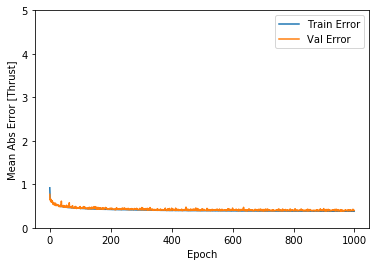

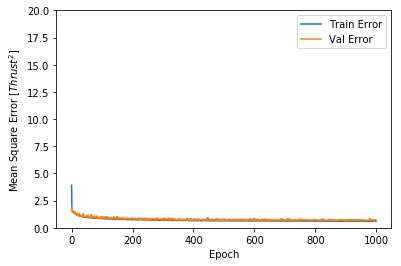

In [16]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Thrust]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$Thrust^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()


plot_history(history)

In [17]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} Thrust".format(mae))

58696/58696 - 1s - loss: 0.6664 - mean_absolute_error: 0.3915 - mean_squared_error: 0.6664
Testing set Mean Abs Error:  0.39 Thrust


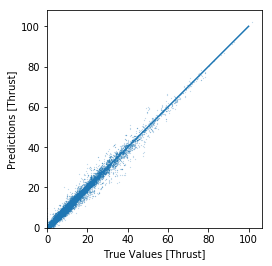

In [18]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions, s=0.01)
plt.xlabel('True Values [Thrust]')
plt.ylabel('Predictions [Thrust]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
# plt.xlim([0,0.5])
# plt.ylim([0,0.5])
_ = plt.plot([-100, 100], [-100, 100])

####  Error Distribution

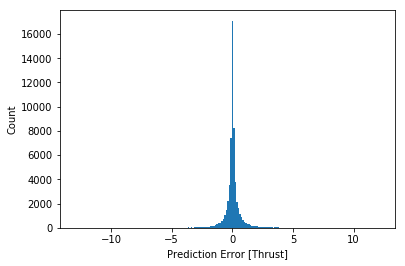

In [19]:
error = test_predictions - test_labels
plt.hist(error, bins = 200)
plt.xlabel("Prediction Error [Thrust]")
_ = plt.ylabel("Count")

## <center>Some Test Cases</center>

In [20]:
input_df = pd.DataFrame([14.3,10.5,4.5,3000]).T
input_df.columns = ['V', 'diameter', 'pitch', 'rpm']
print(input_df)
print(norm(input_df))
model.predict(norm(input_df))
# thrust should be: 0.096

      V  diameter  pitch     rpm
0  14.3      10.5    4.5  3000.0
          V  diameter     pitch       rpm
0 -0.775848  -0.00526 -0.838658 -1.050683


array([[0.15609908]], dtype=float32)

In [21]:
input_df = pd.DataFrame([27.6,5.5,4.5,37000]).T
input_df.columns = ['V', 'diameter', 'pitch', 'rpm']
print(input_df)
print(norm(input_df))
model.predict(norm(input_df))
# thrust should be: 5.112

      V  diameter  pitch      rpm
0  27.6       5.5    4.5  37000.0
          V  diameter     pitch       rpm
0 -0.484421 -1.119499 -0.838658  2.706217


array([[5.7114153]], dtype=float32)

In [22]:
input_df = pd.DataFrame([54.1,8.5,7,13000]).T
input_df.columns = ['V', 'diameter', 'pitch', 'rpm']
print(input_df)
print(norm(input_df))
model.predict(norm(input_df))
# thrust should be: 2.442

      V  diameter  pitch      rpm
0  54.1       8.5    7.0  13000.0
          V  diameter    pitch       rpm
0  0.096242 -0.450955 -0.09199  0.054287


array([[2.2381108]], dtype=float32)

In [23]:
input_df = pd.DataFrame([20.1,11,7,6000]).T
input_df.columns = ['V', 'diameter', 'pitch', 'rpm']
print(input_df)
print(norm(input_df))
model.predict(norm(input_df))
# thrust should be: 1.558

      V  diameter  pitch     rpm
0  20.1      11.0    7.0  6000.0
         V  diameter    pitch       rpm
0 -0.64876  0.106164 -0.09199 -0.719192


array([[1.9325039]], dtype=float32)

## <center>GUI</center>

Prop is available in dataset
only one prop


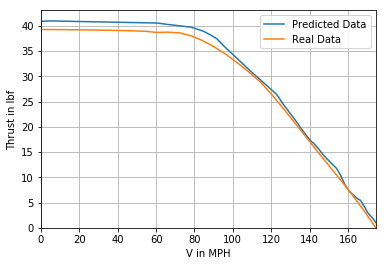

In [24]:
diam = 16
pitch = 10
rpm = 13999
V_values = list(np.linspace(0,200,num=800))

# Predicted Data:
T_values = []
for V_value in V_values:
    input_df = pd.DataFrame([V_value,diam,pitch,rpm]).T
    input_df.columns = ['V', 'diameter', 'pitch', 'rpm']
#     print(input_df)
#     print(norm(input_df))
    T_values.append(model.predict(norm(input_df))[0][0])
    
plt.plot(V_values, T_values, label='Predicted Data')

# Real Data:
prop_df = dataset.loc[dataset['diameter'] == diam].loc[dataset['pitch'] == pitch].loc[dataset['rpm'] == rpm]
if prop_df.shape[0] > 3:    # prop is available in the dataset
    print('Prop is available in dataset')
    if prop_df.loc[prop_df['V'] == 0].index.shape[0] > 1:    # if there are multiple similar props
        V_real = prop_df['V'].loc[int(prop_df.loc[prop_df['V'] == 0].index[0]):int(prop_df.loc[prop_df['V'] == 0].index[1]-1)]
        T_real = prop_df['Thrust'].loc[int(prop_df.loc[prop_df['V'] == 0].index[0]):int(prop_df.loc[prop_df['V'] == 0].index[1]-1)]
        print('multiple props')
    else:    # Only one prop
        V_real = prop_df['V']
        T_real = prop_df['Thrust']
        print('only one prop')

    plt.plot(V_real, T_real, label='Real Data')
    plt.xlim([0,V_real.iloc[-1]])
else:
    print('Prop not available in dataset')


plt.ylim([0,plt.ylim()[1]])
plt.xlabel('V in MPH')
plt.ylabel('Thrust in lbf')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
model.save('Fitting_model.h5')